In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# Define the category names
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# charger le dataset
fmnist = fetch_openml(name="Fashion-MNIST", version=1)
# on peut commencer avec une partie du dataset
n_samples = 4000
data = fmnist.data[:n_samples]
target = fmnist.target[:n_samples]
# on répartit les données en training / test avec un ratio
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33)

C:\Users\Leader\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# display data info
print(x_train.shape)
print(x_test.shape)

(2680, 784)
(1320, 784)


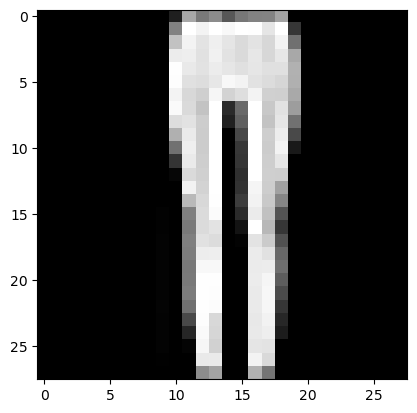

In [3]:
import matplotlib.pyplot as plt

# x_train is a 1D array of 784 value.
# We reshape it to become a 2D array of 28x28 (28 x 28 = 784)
image = x_train.values[0].reshape((28, 28))

# Display image
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
# normalization
x_train = x_train / 255
x_test = x_test / 255 

In [5]:
# display after norm
print(x_train.values.dtype)
print(x_train.min())
print(x_train.max())

float64
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64
pixel1      0.000000
pixel2      0.027451
pixel3      0.203922
pixel4      0.250980
pixel5      0.482353
              ...   
pixel780    0.968627
pixel781    0.905882
pixel782    0.780392
pixel783    0.792157
pixel784    0.149020
Length: 784, dtype: float64


In [6]:
import numpy as np

# Have to convert to numpy to reshape
x_train = x_train.to_numpy().reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.to_numpy().reshape((x_test.shape[0], 28, 28, 1))

In [7]:
import tensorflow.keras as keras

# one hot encoding => Transform to matrix of binary value
num_categories = 10
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test)

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)), # Avoid overfitting
    keras.layers.Flatten(), # convert output of the previous layer into 1D vector
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.33)

Epoch 1/10
29/29 [==============================] - 1s 34ms/step - loss: 1.1336 - accuracy: 0.6139 - val_loss: 0.6757 - val_accuracy: 0.7661
Epoch 2/10
29/29 [==============================] - 1s 21ms/step - loss: 0.6399 - accuracy: 0.7727 - val_loss: 0.5619 - val_accuracy: 0.8011
Epoch 3/10
29/29 [==============================] - 1s 21ms/step - loss: 0.4952 - accuracy: 0.8251 - val_loss: 0.5166 - val_accuracy: 0.8203
Epoch 4/10
29/29 [==============================] - 1s 22ms/step - loss: 0.4158 - accuracy: 0.8507 - val_loss: 0.5404 - val_accuracy: 0.8102
Epoch 5/10
29/29 [==============================] - 1s 20ms/step - loss: 0.3695 - accuracy: 0.8724 - val_loss: 0.5797 - val_accuracy: 0.8034
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 0.3516 - accuracy: 0.8674 - val_loss: 0.4636 - val_accuracy: 0.8339
Epoch 7/10
29/29 [==============================] - 1s 22ms/step - loss: 0.2990 - accuracy: 0.9031 - val_loss: 0.5020 - val_accuracy: 0.8271
Epoch 8/10
29

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


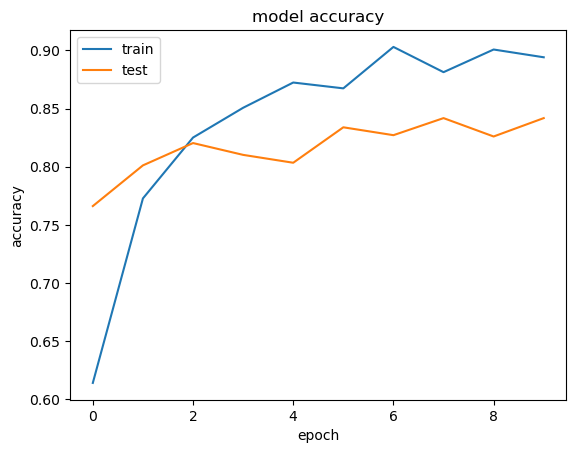

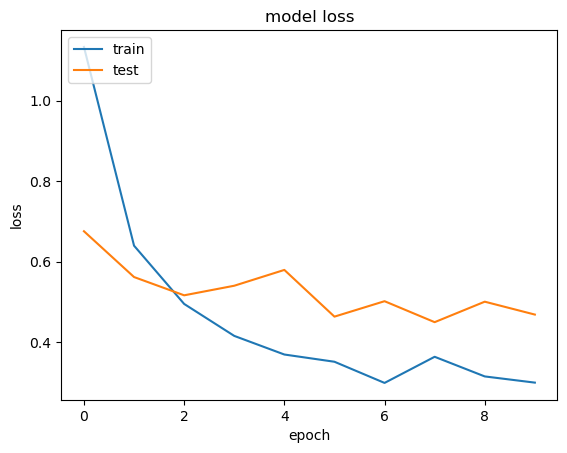

In [10]:
# display history keys and plots
# display history for acc
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# display history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
# Define category names
category_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

predictions = model.predict(x_test)

42/42 [==============================] - 1s 12ms/step


In [40]:
predicted_classes = predictions.argmax(axis=1)

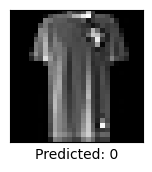

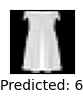

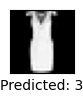

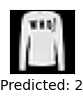

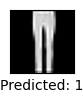

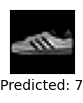

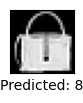

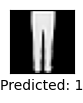

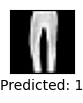

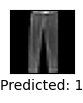

In [45]:
import numpy as np
plt.figure(figsize=(10,10))
for i in range(10):
    idx = np.random.randint(len(x_test))
    image = x_test[idx].reshape((28, 28))
    plt.subplot(5,5,i+1)
    plt.imshow(image, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Predicted: {}'.format(predicted_classes[idx]))
    plt.show()